In [1]:
!python --version

Python 3.7.12


In [5]:
!pip install numpy pandas matplotlib sklearn scikit-plot

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import scikitplot as skplt
from sklearn.metrics import accuracy_score, classification_report

In [7]:
df = pd.read_csv('./covid.csv')
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

pc_encoded = le.fit_transform(df['pc'].values)
wbc_encoded = le.fit_transform(df['wbc'].values)
mc_encoded = le.fit_transform(df['mc'].values)
ast_encoded = le.fit_transform(df['ast'].values)
bc_encoded = le.fit_transform(df['bc'].values)
ldh_encoded = le.fit_transform(df['ldh'].values)

Y = le.fit_transform(df['diagnosis'].values)

In [9]:
X = np.array(list(zip(pc_encoded, wbc_encoded, mc_encoded, ast_encoded, bc_encoded,
                      ldh_encoded)))
print(X)
print(Y)

[[1 1 1 0 1 1]
 [1 1 2 0 1 0]
 [1 0 2 0 1 1]
 [1 0 2 0 0 1]
 [1 2 0 0 1 1]
 [1 2 2 0 1 0]
 [2 1 1 0 1 1]
 [2 0 2 0 1 1]
 [2 0 2 0 0 0]
 [2 2 0 0 1 1]
 [2 2 0 0 1 0]
 [0 1 1 1 1 1]
 [0 2 0 1 1 1]
 [0 2 0 1 0 0]
 [0 0 2 1 1 0]
 [1 2 0 0 0 1]
 [2 2 0 0 0 1]
 [0 1 1 1 1 0]
 [2 2 2 0 1 1]
 [2 0 2 0 1 0]
 [2 1 2 0 1 0]
 [1 0 2 0 0 0]
 [1 1 1 0 0 0]
 [0 0 2 1 1 1]
 [0 2 2 1 1 1]]
[1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0]


In [10]:
model = MultinomialNB()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=111)

In [12]:
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [13]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("\nReport")
print(classification_report(Y_test,y_pred))

Accuracy: 0.8

Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



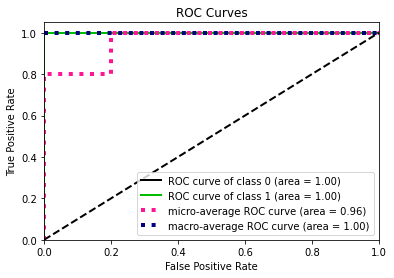

In [14]:
y_prob = model.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_prob)
plt.show()